## Facial keypoints detection

In this task you will create facial keypoint detector based on CNN regressor.


![title](example.png)

### Load and preprocess data

Script `get_data.py` unpacks data — images and labelled points. 6000 images are located in `images` folder and keypoint coordinates are in `gt.csv` file. Run the cell below to unpack data.

In [ ]:
from get_data import unpack
unpack('facial-keypoints-data.zip')

In [1]:
%pylab inline
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import os
import matplotlib.image as mpimg
import pandas as pd
import PIL as PILIM
import pickle
from skimage import feature
from scipy import ndimage as ndi

Populating the interactive namespace from numpy and matplotlib


Now you have to read `gt.csv` file and images from `images` dir. File `gt.csv` contains header and ground truth points for every image in `images` folder. It has 29 columns. First column is a filename and next 28 columns are `x` and `y` coordinates for 14 facepoints. We will make following preprocessing:
1. Scale all images to resolution $100 \times 100$ pixels.
2. Scale all coordinates to range $[-0.5; 0.5]$. To obtain that, divide all x's by width (or number of columns) of image, and divide all y's by height (or number of rows) of image and subtract 0.5 from all values.

Function `load_imgs_and_keypoint` should return a tuple of two numpy arrays: `imgs` of shape `(N, 100, 100, 3)`, where `N` is the number of images and `points` of shape `(N, 28)`.

In [2]:
### Useful routines for preparing data
from numpy import array, zeros
from os.path import join
from skimage.color import gray2rgb
from skimage.io import imread
from skimage.transform import resize

def load_imgs_and_keypoints(dirname='H:\\facial-keypoints\\data\\images'):
    # Write your code for loading images and points here
    imgs = []
    imgs_np=[]
    images_size_list=[[],[]]
    #fnames = os.listdir(path)
    k=6000
    for filename in os.listdir(dirname)[0:k]:
        #print(dirname,filename)
        img = mpimg.imread(os.path.join(dirname,filename))
        if img is not None:
            im_resized = resize(img, (100, 100,3))
            imgs.append(im_resized)
            #plt.imshow(images)
            #plt.show()
            images_size=img.shape
            images_size_list[0].append(images_size[0])
            images_size_list[1].append(images_size[1])
            #images_size_list.append(img.shape)
    imgs_np = np.array(imgs)     

    
    
    f = open(u'H:\\facial-keypoints\\data\\gt.csv')
    data = pd.read_csv(f, sep=',')
    data=data.values[:,1:]
    
    print(data)
    
    for i in range(0,k):
        data[i]=(data[i]/images_size_list[0][i])-0.5
    
    print(type(images_size_list))
    print(size(images_size_list))
    print((images_size_list))
    print(data)
    #data.columns[1:]
    
    
    return imgs_np,data

imgs, points = load_imgs_and_keypoints()

[[51 51 127 ..., 180 168 179]
 [21 20 36 ..., 66 60 65]
 [23 116 39 ..., 100 121 81]
 ..., 
 [21 33 41 ..., 114 94 111]
 [8 13 17 ..., 35 34 34]
 [9 8 17 ..., 33 32 32]]
<class 'list'>
12000
[[262, 94, 166, 124, 189, 177, 204, 471, 81, 93, 355, 143, 192, 63, 229, 268, 231, 421, 143, 686, 314, 1331, 354, 1873, 249, 84, 224, 219, 150, 529, 1220, 137, 139, 1494, 106, 112, 352, 109, 113, 147, 415, 237, 1298, 444, 301, 981, 298, 312, 157, 51, 1457, 170, 180, 61, 147, 151, 131, 194, 455, 167, 606, 569, 252, 1247, 108, 750, 210, 1127, 196, 218, 180, 255, 222, 698, 164, 895, 242, 227, 98, 124, 1413, 83, 141, 389, 1040, 158, 126, 204, 260, 338, 301, 201, 103, 278, 122, 107, 249, 116, 135, 61, 837, 242, 140, 179, 910, 198, 252, 285, 232, 279, 356, 1529, 421, 377, 483, 492, 320, 322, 251, 425, 569, 245, 119, 200, 468, 111, 90, 149, 61, 319, 189, 1171, 230, 140, 97, 185, 306, 375, 82, 195, 240, 264, 175, 154, 847, 83, 113, 142, 222, 244, 417, 717, 460, 735, 87, 82, 84, 726, 93, 132, 1058, 196, 81,

C:\Users\1\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1324: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


array([[[ 0.24404353,  0.10678863,  0.02051412],
        [ 0.24580392,  0.10854902,  0.02227451],
        [ 0.24672353,  0.10946863,  0.02319412],
        ..., 
        [ 0.28032745,  0.23393137,  0.14475882],
        [ 0.17923961,  0.13619412,  0.06478353],
        [ 0.08403216,  0.04490784,  0.01366588]],

       [[ 0.23141176,  0.09415686,  0.01564706],
        [ 0.22756824,  0.09031333,  0.01180353],
        [ 0.23005294,  0.09279804,  0.01428824],
        ..., 
        [ 0.36243333,  0.25951961,  0.1345    ],
        [ 0.3094098 ,  0.20788   ,  0.10231255],
        [ 0.28357804,  0.18208824,  0.08963059]],

       [[ 0.2318    ,  0.0945451 ,  0.01866275],
        [ 0.24813137,  0.11087647,  0.03499412],
        [ 0.25980392,  0.12254902,  0.04666667],
        ..., 
        [ 0.3437451 ,  0.21433333,  0.08823529],
        [ 0.36300588,  0.23107255,  0.11721765],
        [ 0.28385098,  0.15463529,  0.05079608]],

       ..., 
       [[ 0.40641176,  0.33939608,  0.30247255],
        

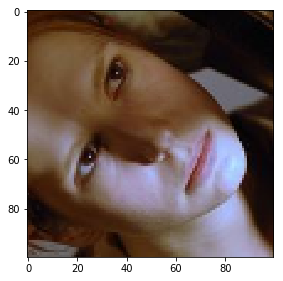

In [4]:
# Example of output
%matplotlib inline
from skimage.io import imshow
imshow(imgs[2])
points[2]
imgs[2]

### Visualize data

Let's prepare a function to visualize points on image. Such function obtains two arguments: an image and a vector of points' coordinates and draws points on image (just like first image in this notebook).

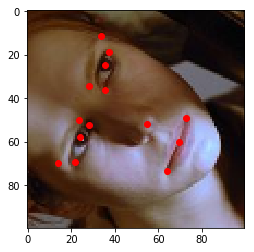

In [7]:
import matplotlib.pyplot as plt
# Circle may be useful for drawing points on face
# See matplotlib documentation for more info
from matplotlib.patches import Circle

def visualize_points(imgv, pointsv):
    # Write here function which obtains image and normalized
    # coordinates and visualizes points on image
    
    plt.imshow(imgv)
    plt.scatter(100*(pointsv[0::2]+0.5),100*(pointsv[1::2]+0.5),c="r" )
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    pass
k=2    
visualize_points(imgs[k], points[k])

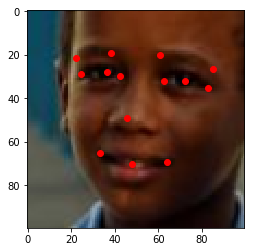

In [8]:
k=1    
visualize_points(imgs[k], points[k])

### Train/val split

Run the following code to obtain train/validation split for training neural network.

### Simple data augmentation

For better training we will use simple data augmentation — flipping an image and points. Implement function flip_img which flips an image and its' points. Make sure that points are flipped correctly! For instance, points on right eye now should be points on left eye (i.e. you have to mirror coordinates and swap corresponding points on the left and right sides of the face). VIsualize an example of original and flipped image.

In [9]:
def flips_img(img_func, points_func):
    #print(points_func)
    flip_points=points_func.copy()#[0::2]*(-1)
    flip_points_rot=flip_points.copy()
    for i in range(0,28,2):
        flip_points_rot[i]=flip_points[i]*(-1)
    #print(flip_points)
    
    lr=np.fliplr(img_func)
    
    #flip_image=img_func
    #flip_image_new=img_func
    #for i in range(1,100):
    #    for j in range (1,100):
    #        for k in range(0,3):
    #            flip_image_new[i][100-j][k]=img_func[i][j][k]
    #from PIL import Image
    #im = Image.open("test.png")
    #im = im.transpose(Image.FLIP_LEFT_RIGHT)
    #im.show()
    # Write your code for flipping here
    #100*(points[0::2]+0.5),100*(points[1::2]+0.5)
    
    return lr,flip_points_rot




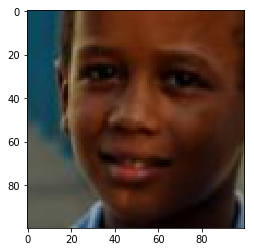

In [10]:
plt.imshow(imgs[1])
plt.show()

Time to augment our training sample. Apply flip to every image in training sample. As a result you should obtain two arrays: `aug_imgs_train` and `aug_points_train` which contain original images and points along with flipped ones.

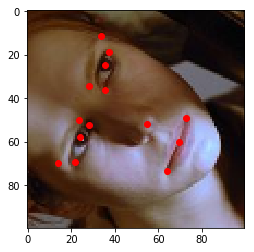

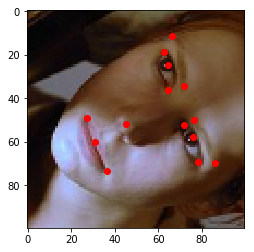

(100, 100, 3) (28,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [12]:
k=2
visualize_points(imgs[k], points[k])
f_img, f_points = flips_img(imgs[k], points[k])
visualize_points(f_img, f_points)
print(shape(f_img), shape(f_points))
print(type(f_img), type(f_points))


In [13]:
aug_imgs_train=imgs.copy()

In [14]:
aug_points_train=points.copy()

In [ ]:
for k in range (0,4):
    print(shape(imgs[k]), type(points[k]))
    print(shape(imgs[k]), type(points[k]))
    
    print(shape(aug_imgs_train[k]), type(aug_points_train[k]))
    print(shape(aug_imgs_train[k]), type(aug_points_train[k]))
    #visualize_points(aug_imgs_train[k], aug_points_train[k])

In [15]:
# Write your code here
for k in range (0,6000):
    #visualize_points(imgs[k], points[k])
    f_img, f_points = flips_img(imgs[k], points[k])
    #visualize_points(f_img, f_points)
    aug_imgs_train[k]=f_img
    aug_points_train[k] =f_points
    #visualize_points( aug_imgs_train[k],  aug_points_train[k])


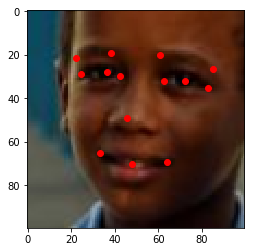

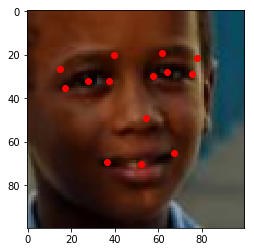

In [16]:
visualize_points(imgs[1], points[1])
visualize_points( aug_imgs_train[1],  aug_points_train[1])

In [ ]:
for k in range (0,4):
    print(shape(imgs[k]), type(points[k]))
    print(shape(imgs[k]), type(points[k]))
    
    print(shape(aug_imgs_train[k]), type(aug_points_train[k]))
    print(shape(aug_imgs_train[k]), type(aug_points_train[k]))
    #visualize_points(aug_imgs_train[k], aug_points_train[k])

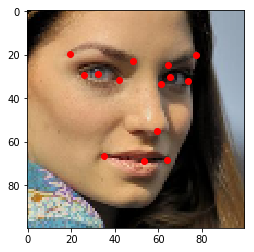

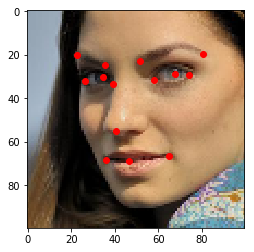

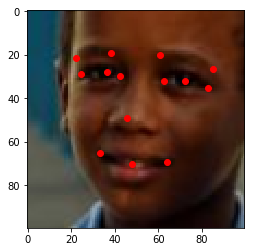

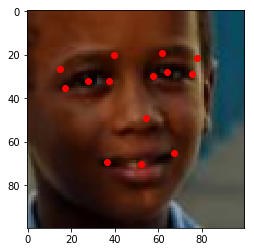

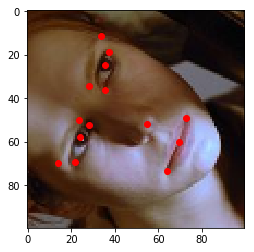

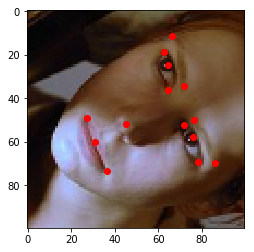

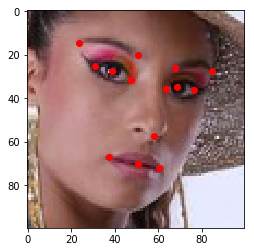

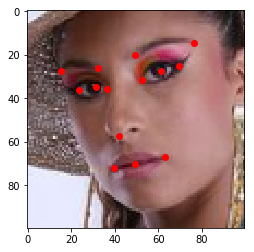

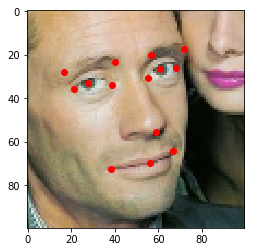

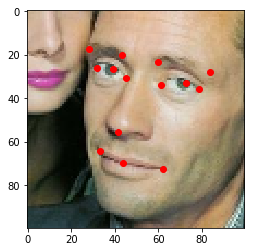

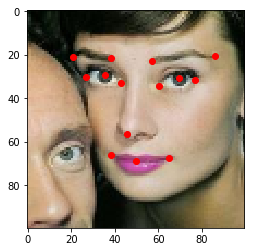

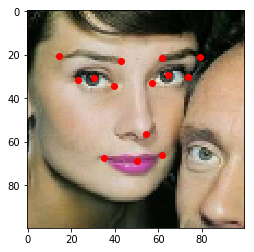

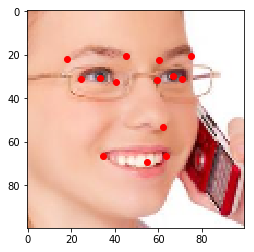

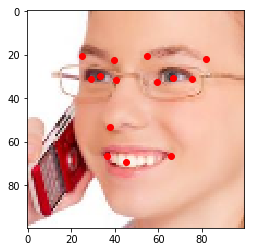

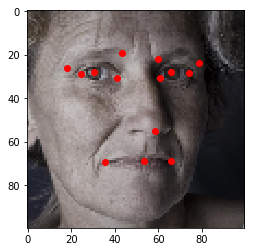

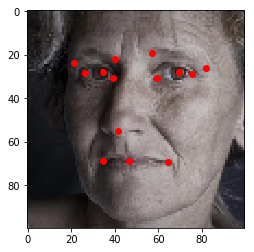

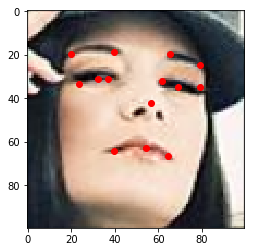

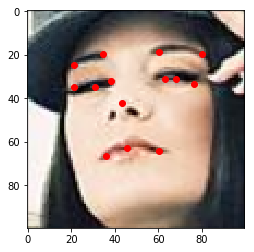

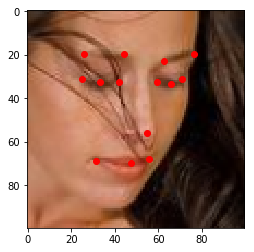

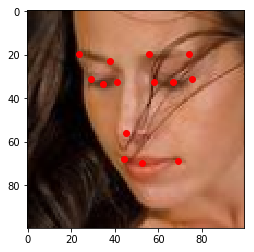

In [17]:
for k in range (0,10):
    visualize_points(imgs[k], points[k])
    #f_img, f_points = flips_img(imgs[k], points[k])
    #visualize_points(f_img, f_points)
    #aug_imgs_train[k]=f_img
    #aug_points_train[k] =f_points
    visualize_points( aug_imgs_train[k],  aug_points_train[k])

In [18]:
aug_imgs_train2=np.concatenate([aug_imgs_train,imgs])
aug_points_train2=np.concatenate([aug_points_train,points])

In [ ]:
kf=1
ks=kf+6000
visualize_points(imgs[kf], points[kf])
visualize_points(aug_imgs_train[kf], aug_points_train[kf])
visualize_points(aug_imgs_train2[kf], aug_points_train2[kf])
visualize_points(aug_imgs_train2[ks], aug_points_train2[ks])

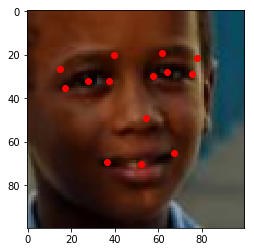

In [19]:
k=1
visualize_points(aug_imgs_train2[k], aug_points_train2[k])


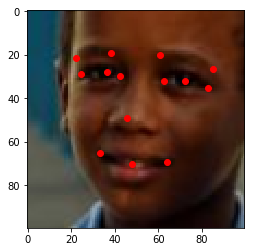

In [20]:
k=6001
visualize_points(aug_imgs_train2[k], aug_points_train2[k])

In [21]:
shape(aug_imgs_train2)

(12000, 100, 100, 3)

In [22]:
shape(aug_points_train2)

(12000, 28)

### Network architecture and training

Now let's define neural network regressor. It will have 28 outputs, 2 numbers per point. The precise architecture is up to you. We recommend to add 2-3 (`Conv2D` + `MaxPooling2D`) pairs, then `Flatten` and 2-3 `Dense` layers. Don't forget about ReLU activations. We also recommend to add `Dropout` to every `Dense` layer (with p from 0.2 to 0.5) to prevent overfitting.


In [23]:
from keras.models import Sequential
from keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout
)


Using TensorFlow backend.


In [ ]:
from keras import backend as K
K.set_image_dim_ordering('tf')

In [72]:
from sklearn.model_selection import train_test_split
imgs_train, imgs_val, points_train, points_val = train_test_split(aug_imgs_train2[0:1000], aug_points_train2[0:1000], test_size=0.1)

In [62]:
import keras
import tensorflow as tf

In [101]:
#model = Sequential([keras.layers.Flatten(input_shape=(100, 100,3)),
#                         keras.layers.Dense(128, activation="relu"),
#                         keras.layers.Dropout(0.5),
#                         keras.layers.Dense(64, activation="relu"),
#                         keras.layers.Dense(28)
#                         ])


model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(100, 100, 3), activation='relu', data_format="channels_last"))
# Второй сверточный слой
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same', data_format="channels_last"))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(3, 3)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
#model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(128, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(64, activation='relu'))
model.add(Dense(28))

# Задаем параметры оптимизации
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='mse', optimizer=sgd, metrics=['mae'])

In [102]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='mse',
              metrics=['mae'])

In [103]:
model.fit(imgs_train, points_train, epochs=50)

Epoch 1/50
900/900 [==============================] - 39s - loss: 0.0282 - mean_absolute_error: 0.1264    
Epoch 2/50
900/900 [==============================] - 37s - loss: 0.0085 - mean_absolute_error: 0.0707    
Epoch 3/50
900/900 [==============================] - 36s - loss: 0.0062 - mean_absolute_error: 0.0590    
Epoch 4/50
900/900 [==============================] - 37s - loss: 0.0052 - mean_absolute_error: 0.0517    
Epoch 5/50
900/900 [==============================] - 36s - loss: 0.0046 - mean_absolute_error: 0.0477    
Epoch 6/50
900/900 [==============================] - 37s - loss: 0.0042 - mean_absolute_error: 0.0444    
Epoch 7/50
900/900 [==============================] - 36s - loss: 0.0041 - mean_absolute_error: 0.0429    
Epoch 8/50
900/900 [==============================] - 37s - loss: 0.0040 - mean_absolute_error: 0.0420    
Epoch 9/50
900/900 [==============================] - 38s - loss: 0.0040 - mean_absolute_error: 0.0413    
Epoch 10/50
900/900 [================

In [104]:
imgs_train.shape

(900, 100, 100, 3)

In [105]:
imgs_val.shape

(100, 100, 100, 3)

In [106]:
points_train.shape

(900, 28)

In [107]:
points_val.shape

(100, 28)

In [108]:
model2 = Sequential()
# Первый сверточный слой
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=(100, 100, 3), activation='relu', data_format="channels_last"))
# Второй сверточный слой
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same', data_format="channels_last"))
# Первый слой подвыборки
model2.add(MaxPooling2D(pool_size=(3, 3)))
# Слой регуляризации Dropout
model2.add(Dropout(0.25))

# Третий сверточный слой
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
#model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model2.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model2.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model2.add(Flatten())
# Полносвязный слой для классификации
model2.add(Dense(128, activation='relu'))
# Слой регуляризации Dropout
model2.add(Dropout(0.5))
# Выходной полносвязный слой
model2.add(Dense(64, activation='relu'))
model2.add(Dense(28))

# Задаем параметры оптимизации
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='mse', optimizer=sgd, metrics=['mae'])

In [109]:
model2.fit(imgs_train, points_train, epochs=50)

Epoch 1/50
900/900 [==============================] - 37s - loss: 0.0441 - mean_absolute_error: 0.1696    
Epoch 2/50
900/900 [==============================] - 35s - loss: 0.0202 - mean_absolute_error: 0.1177    
Epoch 3/50
900/900 [==============================] - 34s - loss: 0.0133 - mean_absolute_error: 0.0939    
Epoch 4/50
900/900 [==============================] - 35s - loss: 0.0098 - mean_absolute_error: 0.0791    
Epoch 5/50
900/900 [==============================] - 38s - loss: 0.0077 - mean_absolute_error: 0.0687    
Epoch 6/50
900/900 [==============================] - 36s - loss: 0.0066 - mean_absolute_error: 0.0622    
Epoch 7/50
900/900 [==============================] - 36s - loss: 0.0059 - mean_absolute_error: 0.0574    
Epoch 8/50
900/900 [==============================] - 36s - loss: 0.0054 - mean_absolute_error: 0.0544    
Epoch 9/50
900/900 [==============================] - 37s - loss: 0.0051 - mean_absolute_error: 0.0514    
Epoch 10/50
900/900 [================

In [110]:
predict = model.predict(aug_imgs_train2[0:10])

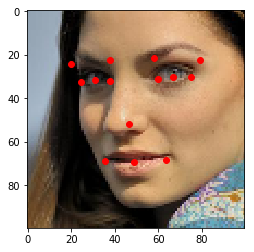

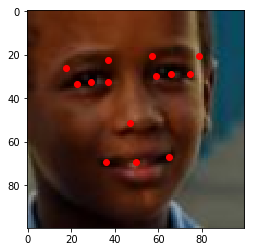

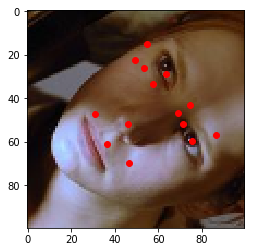

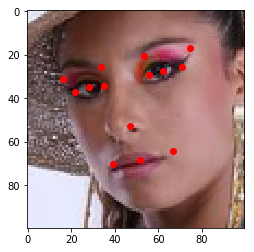

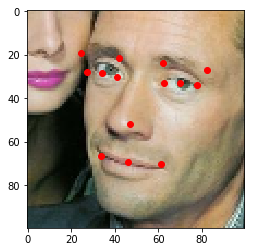

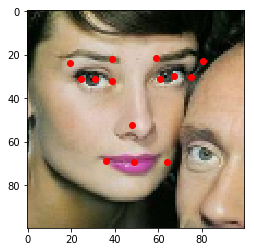

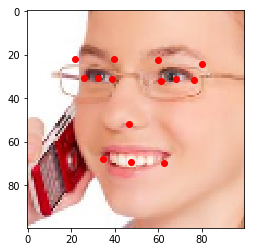

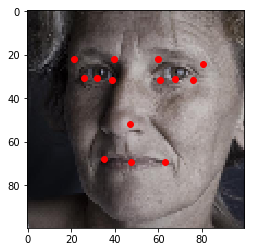

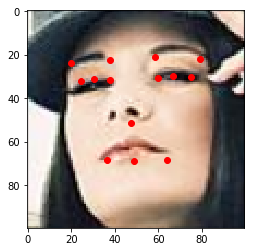

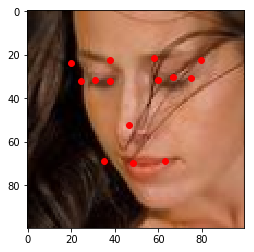

In [111]:
for k in range (0,10):
    visualize_points(aug_imgs_train2[k], predict[k])

In [112]:
predict2 = model2.predict(aug_imgs_train2[0:10])

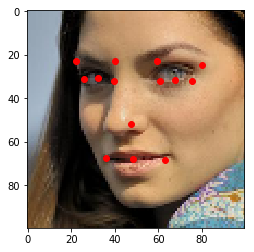

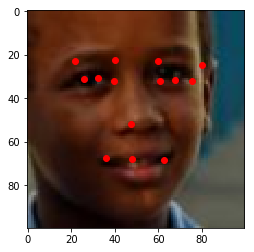

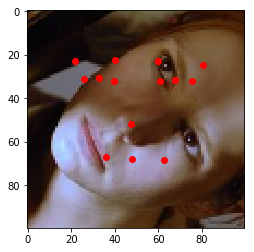

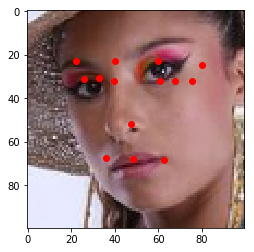

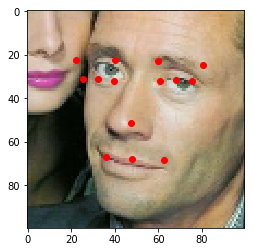

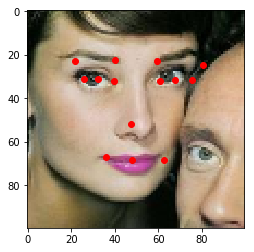

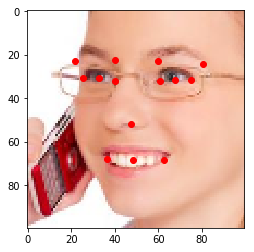

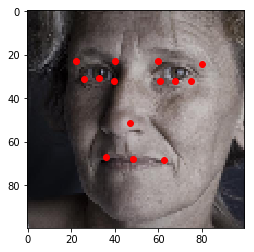

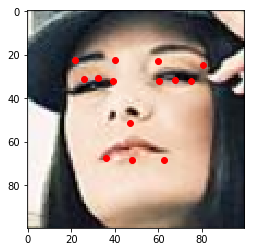

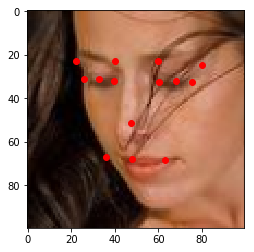

In [113]:
for k in range (0,10):
    visualize_points(aug_imgs_train2[k], predict2[k])

Time to train! Since we are training a regressor, make sure that you use mean squared error (mse) as loss. Feel free to experiment with optimization method (SGD, Adam, etc.) and its' parameters.

In [ ]:
# ModelCheckpoint can be used for saving model during training.
# Saved models are useful for finetuning your model 
# See keras documentation for more info
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam

# Choose optimizer, compile model and run training

### Visualize results

Now visualize neural network results on several images from validation sample. Make sure that your network outputs different points for images (i.e. it doesn't output some constant).

In [ ]:
# Example of output